# **Understanding of AUC-ROC Curve**
In Machine Learning, it is crucial to measure the performance of your model in order to estimate that how good is your model for a specific dataset.
For classification problems we can use AUC-ROC curve for performance measurement.

### **What is meant by ROC?**


1.   ROC stands for "Receiver Operator Characteristics".
2.   A classification model can also predict the probability of data points that may occur in different classes.
3.   Using those probabilities, we can segregate them; by finding Sensitivity(True Positive Rate) and Specifity(1-False Positive Rate) and at various thresholds.
4. We plot TPR on y-axis against FPR on x-axis.
5. It is basically used to evaluate the strength of a model.
6. It can also be used to compare the strength of two models.

### **What is meant by AUC?**
1. AUC stands for "Area Under the Curve".
2. It provides a collective measurement of performance across all possible thresholds.
3. It gives you an overall perspective of the ability of a model to distinguish between classes.
4. The higher the AUC the better your model in terms of interpreting classes.
5. AUC = 1 means Model is perfect in distinguishing.
6. AUC > 0.5 means Model is somehow acceptable.
7. AUC = 0.5 means Model is unable to predict.
8. AUC = 0 means Model is working in a reversed direction i.e. +ve class is showing as -ve and vice versa.

### **How can the AUC-ROC Curve be plotted?**
We need to remember few things:
1. TPR is sensitivity.
2. An increment in TPR is an increase in "sensitivty" - means model is working good on discrimination Positive class points.
3. FPR is 1-specifity.
4. An increment FPR is a decrease in "specifity" - means model is not working good on discrimination of Negative class points.
5. Thus, an ideal situation would be when both sensitivity and specifity lied at their highest point.
6. On graph (x,y) -> (FPR,TPR) -> (0,1) = Perfectly classifying both -ve and +ve class points.
7. On graph (x,y) -> (FPR,TPR) -> (1,1) = Incorrect in classifying -ve points but, Perfect in classifying +ve points.
8. On graph (x,y) -> (FPR,TPR) -> (0,0) = Perfect in classifying -ve points but, incorrect in classifying +ve points.

I hope this detailed description will help in understanding the curves plotted below using built-in methods to calculate ROC curve using sklearn library.




# **Logistic Regression on Binary Classification**

Here, I have downloaded "diabetes" dataset from kaggle and stored it on git.

The dataset contains 9 features including column "Outcome" which flags if a patient is diabetic or not i.e. it has two classes 1 and 0 respectively.


In [1]:
# Import libraries
from sklearn import metrics
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

# Build models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Multiclass model
from sklearn.multiclass import OneVsRestClassifier

# Plots
import matplotlib.pyplot as plt

In [2]:
# Fetch dataset from github

git_url_dataset= "https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/diabetes.csv"

diabetes= pd.read_csv(git_url_dataset)
print("Total no. of rows: ", diabetes.shape[0], " | Total no. of columns: ", diabetes.shape[1],)
print(diabetes.head())

# Splitting train and test dataset
X=diabetes.drop(["Outcome"], axis=1)
y=diabetes["Outcome"]
train_X,test_X,train_y,test_y = train_test_split (X,y,test_size=0.2,random_state=3)


Total no. of rows:  768  | Total no. of columns:  9
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [3]:
# Applying different classifiers

model1 = LogisticRegression(max_iter=1000)
model2 = KNeighborsClassifier()
model3= RandomForestClassifier()

# fit model
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)
model3.fit(train_X, train_y) 

#this will give discrete predict values
y_pred1 = model1.predict(test_X) 

# predict probabilities
pred_prob1 = model1.predict_proba(test_X)
pred_prob2 = model2.predict_proba(test_X)
pred_prob3 = model3.predict_proba(test_X)

# making confusion matrix and storing its metrics to calculate sensitivty and specifity
confusion=metrics.confusion_matrix(test_y,y_pred1)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Model matrix confusion: ", "\n",confusion)
print ("--"*30)
print ("Model sensitivity: ", TP / float(FN + TP))
print ("--"*30)
print ("Model specificity: ", TN / (TN + FP))
print ("__"*30)


# computing roc curve and storing fpr,tpr and thresholds
fpr1, tpr1, thresh1 = metrics.roc_curve(test_y, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = metrics.roc_curve(test_y, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = metrics.roc_curve(test_y, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = metrics.roc_curve(test_y, random_probs, pos_label=1)


# auc scores
auc_score1 = metrics.roc_auc_score(test_y, pred_prob1[:,1])
auc_score2 = metrics.roc_auc_score(test_y, pred_prob2[:,1])
auc_score3 = metrics.roc_auc_score(test_y, pred_prob3[:,1])

print ("Model roc auc score: ",auc_score1)
print ("--"*30)
print ("Model KNN: ",auc_score2)
print ("--"*30)
print ("Model Random Forest: ",auc_score3)


Model matrix confusion:  
 [[78 14]
 [26 36]]
------------------------------------------------------------
Model sensitivity:  0.5806451612903226
------------------------------------------------------------
Model specificity:  0.8478260869565217
____________________________________________________________
Model roc auc score:  0.8213534361851331
------------------------------------------------------------
Model KNN:  0.742023141654979
------------------------------------------------------------
Model Random Forest:  0.7915497896213184


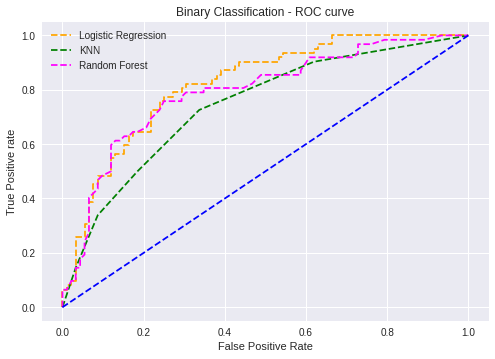

____________________________________________________________

Outcome: Here we can say that Logistic Regression did the best job followed by Random Forest then KNN.


In [5]:
# Plotting the curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='magenta', label='Random Forest')

# anything on this line shows fpr and tpr become equal
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue') 

# title
plt.title('Binary Classification - ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
print ("__"*30)

print("\nOutcome: Here we can say that Logistic Regression did the best job followed by Random Forest then KNN.")

# **Logistic  Regression on Multi Class Classification**
Here, I have fetched dataset from UCI-Machine Learning Repository.

The dataset description is present here: https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/hydraulic_description 

The Hydraulic dataset has total 5 features including Pump Leakage which has 3 attributes:

*   0: no leakage
*   1: weak leakage
*   2: severe leakage

Pump_leakage is going to be our target value. 0,1 and 2 will be our classes.

By applying multi class classification we will identify that how well the hydraulic pump leakage is classified with the given values.

The ROC curve for class 0 will be drawn against class 1 and 2.

Similarly, the ROC curve or class 1 will be drawn against class 0 and 2.

Lastly, the ROC curve for class 2 will be drawn against class 0 and 1.



In [7]:
# Fetching Dataset from Github

git_url_dataset= "https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/hydraulic.csv"
hydraulic= pd.read_csv(git_url_dataset)
print("Total no. of rows: ", hydraulic.shape[0], " | Total no. of columns: ", hydraulic.shape[1],)
hydraulic.head()

Total no. of rows:  2205  | Total no. of columns:  5


,Cooler,Valve,Pump_Leakage,Accumulator,Stable_flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [8]:
# Internal pump leakage:
# 	0: no leakage
# 	1: weak leakage
# 	2: severe leakage

print("Pump leakage distribution")
print(hydraulic.groupby('Pump_Leakage').size())

# Splitting train and test dataset
X=hydraulic.drop(["Pump_Leakage"], axis=1)
y=hydraulic["Pump_Leakage"]
train_X,test_X,train_y,test_y = train_test_split (X,y,test_size=0.2,random_state=3)

train_samples, n_features = train_X.shape
n_classes = np.unique(y).shape[0]

print('Hydraulic Dataset, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

Pump leakage distribution
Pump_Leakage
0    1221
1     492
2     492
dtype: int64
Hydraulic Dataset, train_samples=1764, n_features=4, n_classes=3


In [14]:
# fit model

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
pred_prob = clf.predict_proba(test_X)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(test_y, pred_prob[:,i], pos_label=i)
    # print(fpr[i], tpr[i], thresh[i])

random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = metrics.roc_curve(test_y, random_probs, pos_label=1)

#calculating accuracy
accuracy = np.sum(pred == test_y) / test_y.shape[0]
print("accuracy:",accuracy)
confusion = metrics.multilabel_confusion_matrix(test_y, pred)
print("confusion matrix:\n",confusion)

accuracy: 0.5328798185941043
confusion matrix:
 [[[102  89]
  [ 57 193]]

 [[259  91]
  [ 58  33]]

 [[315  26]
  [ 91   9]]]


Outcome: Here we have applied same model for all three classes. 
So, by looking at the graph, we can say that 
Class 0 is classified better than other two classes.
Also, since class 1 and class 2 are closer to the blue line which shows that their predicted probabilities are overlapping.


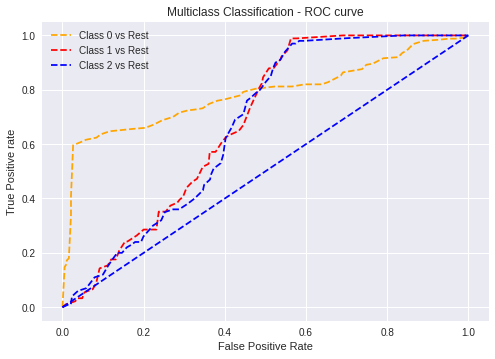

In [16]:
# plotting Multiclass ROC Curve

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

# anything on this line shows fpr and tpr become equal
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue') 

plt.title('Multiclass Classification - ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=500);  

print("Outcome: Here we have applied same model for all three classes. \nSo, by looking at the graph, we can say that \nClass 0 is classified better than other two classes.")
print("Also, since class 1 and class 2 are closer to the blue line which shows that their predicted probabilities are overlapping.")

## **Comparison of Multinomial Vs. OVR Logistic Regression**


Here we are doing a comparison of multinomial logistic L1 vs one-versus-rest L1 logistic regression.

Here, we found that Multinomial logistic regression yields more accurate results than one-versus-rest LR and also, Multinomial logistic is considered to be faster when you need to train on the larger scale dataset.

Here, we visualize the "performance" of multi-class models according to their curves. 

Model= One versus Rest
------------------------------------------------------------
Accuracy=0.5668934240362812, Number of epochs: 1, Run time 0.01
Accuracy=0.5510204081632653, Number of epochs: 9, Run time 0.01
Accuracy=0.5555555555555556, Number of epochs: 19, Run time 0.02
------------------------------------------------------------
Model= Multinomial
------------------------------------------------------------
Accuracy=0.5668934240362812, Number of epochs: 1, Run time 0.01
Accuracy=0.5578231292517006, Number of epochs: 7, Run time 0.01
Accuracy=0.5691609977324263, Number of epochs: 21, Run time 0.02
------------------------------------------------------------
Total time run in 0.140 s


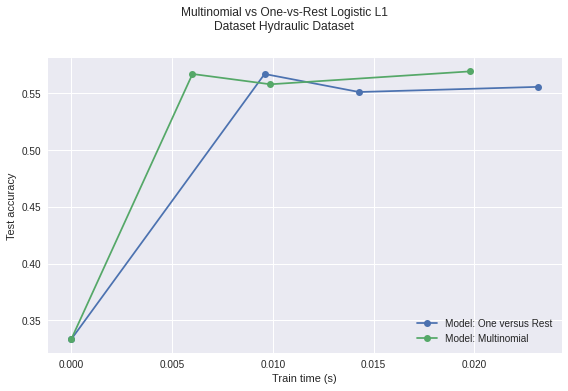

In [12]:
#To skip warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
#Record run time
import timeit


warnings.filterwarnings("ignore", category=ConvergenceWarning,module="sklearn")
t0 = timeit.default_timer()

# We use lbfgs solver since our dataset is not too large
# In case dataset is larger than "saga" should be use as a solver and set n_sample to "10000"
solver = 'lbfgs'

# Turn down for faster run time
n_samples = 10000

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 9, 19]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 7, 21]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]

    model_params = models[model]
    print('Model=',model_params['name'])
    print ("--"*30)

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(train_X, train_y)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(test_X)
        accuracy = np.sum(y_pred == test_y) / test_y.shape[0]
        print('Accuracy=%s, Number of epochs: %s, Run time %.2f' %
              (accuracy, this_max_iter,train_time))
        
        accuracies.append(accuracy)
        times.append(train_time)
    
    models[model]['times'] = times
    models[model]['accuracies'] = accuracies
    
    print ("--"*30)

#Plotting times,accuracies w.r.t model
fig = plt.figure()
ax = fig.add_subplot(111)
for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % 'Hydraulic Dataset')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print('Total time run in %.3f s' % run_time)
plt.show()